Fernando González Colín

Ciudad de México, México

gc.fernando.96@gmail.com

References:

https://www.youtube.com/watch?v=iMIWee_PXl8&t=367s

https://keras.io/examples/addition_rnn/

https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Build dataset

In [2]:
data=np.asarray([[[i+j] for i in range(5)] for j in range(1000)])
target=np.asarray([(i+5) for i in range(1000)])

# Normalization
data=(data-data.min())/(data.max()-data.min())
target=(target-target.min())/(target.max()-target.min())

In [3]:
x_train,x_test,y_train,y_test=train_test_split(data, target, test_size=0.2)

# Build model

In [4]:
model=keras.Sequential()
model.add(layers.LSTM((5),batch_input_shape=(None,5,1), return_sequences=True))
model.add(layers.LSTM((1),batch_input_shape=(None,5,1), return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 5)              140       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 28        
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


# Train model

In [5]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 2s 3ms/step - loss: 0.5735 - acc: 0.0000e+00 - val_loss: 0.5065 - val_acc: 0.0050
Epoch 2/100
800/800 [==============================] - 0s 266us/step - loss: 0.5212 - acc: 0.0000e+00 - val_loss: 0.4583 - val_acc: 0.0050
Epoch 3/100
800/800 [==============================] - 0s 253us/step - loss: 0.4731 - acc: 0.0000e+00 - val_loss: 0.4102 - val_acc: 0.0050
Epoch 4/100
800/800 [==============================] - 0s 260us/step - loss: 0.4193 - acc: 0.0000e+00 - val_loss: 0.3517 - val_acc: 0.0050
Epoch 5/100
800/800 [==============================] - 0s 242us/step - loss: 0.3513 - acc: 0.0000e+00 - val_loss: 0.2829 - val_acc: 0.0050
Epoch 6/100
800/800 [==============================] - 0s 256us/step - loss: 0.2795 - acc: 0.0000e+00 - val_loss: 0.2269 - val_acc: 0.0050
Epoch 7/100
800/800 [==============================] - 0s 256us/step - loss: 0.2283 - acc: 0.0000e+00 - val_loss: 0.2030 -

Epoch 61/100
800/800 [==============================] - 0s 235us/step - loss: 0.0045 - acc: 0.0013 - val_loss: 0.0052 - val_acc: 0.0050
Epoch 62/100
800/800 [==============================] - 0s 263us/step - loss: 0.0046 - acc: 0.0013 - val_loss: 0.0050 - val_acc: 0.0050
Epoch 63/100
800/800 [==============================] - 0s 246us/step - loss: 0.0044 - acc: 0.0013 - val_loss: 0.0044 - val_acc: 0.0050
Epoch 64/100
800/800 [==============================] - 0s 254us/step - loss: 0.0045 - acc: 0.0013 - val_loss: 0.0042 - val_acc: 0.0050
Epoch 65/100
800/800 [==============================] - 0s 258us/step - loss: 0.0046 - acc: 0.0013 - val_loss: 0.0043 - val_acc: 0.0050
Epoch 66/100
800/800 [==============================] - 0s 253us/step - loss: 0.0042 - acc: 0.0013 - val_loss: 0.0042 - val_acc: 0.0050
Epoch 67/100
800/800 [==============================] - 0s 250us/step - loss: 0.0043 - acc: 0.0013 - val_loss: 0.0043 - val_acc: 0.0050
Epoch 68/100
800/800 [==========================

# Test model

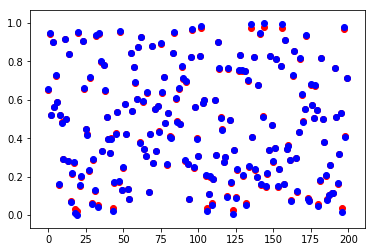

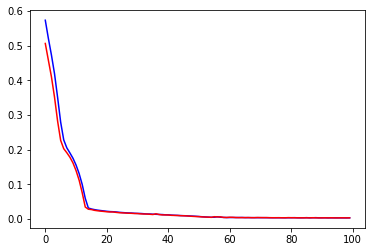

In [6]:
results=model.predict(x_test)
plt.scatter(range(200),results,c='r')
plt.scatter(range(200),y_test,c='b')
plt.show()

plt.plot(history.history['loss'],c='b')
plt.plot(history.history['val_loss'],c='r')
plt.show()